##Loading libraries


##check this tutorial !!??

https://pyimagesearch.com/2021/10/11/pytorch-transfer-learning-and-image-classification/

In [ ]:
import torch
import torch.nn as nn
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import models, transforms
import time
from torchvision import datasets
from torchvision.datasets import ImageFolder
from zipfile import ZipFile
import os
import glob
import numpy as np
import requests
from collections import Counter

In [ ]:
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# @title unzip the datasetfile
file_name='Alzhamier.zip'
with ZipFile(file_name,'r') as zip:
  #zip.printdir()
  #extracting all the files
  print('Extracting all the files now ...')
  zip.extractall()
  print('Done!')


Extracting all the files now ...
Done!


In [ ]:
##Function to store all the files in an array

def get_all_file_paths(directory):
  #initializing empty file paths list
  file_paths=[]
  #crawling through directory and subdirectories
  for root , directories ,files in os.walk (directory):
    for filename in files:
      #join the two strings in order to form the full fi
      filepath=os.path.join(root, filename)
      file_paths.append(filepath)
  return file_paths


In [ ]:
Test_dir='/content/Alzheimer_s Dataset/test'
Train_dir='/content/Alzheimer_s Dataset/train'
train_paths=get_all_file_paths(Train_dir)
test_paths=get_all_file_paths(Test_dir)

In [ ]:
print(f'the train dataset consists of {len(train_paths)} images ')
print(f'the test dataset consists of {len(test_paths)} images')

the train dataset consists of 5121 images 
the test dataset consists of 1279 images


In [ ]:
# Target labels
targets = ["MildDemented","ModerateDemented","NonDemented","VeryMildDemented"]
dataset = ["test","train"]
test_dict = {}
train_dict = {}
for target in targets:
    test_dict[target] = glob.glob(f"/content/Alzheimer_s Dataset/test/{target}/*")
    train_dict[target] = glob.glob(f"/content/Alzheimer_s Dataset/train/{target}/*")

In [ ]:
test_class_dict={key:len(value) for key ,value in test_dict.items()}
train_class_dict={key:len(value) for key , value in train_dict.items()}

##class labels distribution in the dataset

In [ ]:
print(f'the test dataset contains {test_class_dict} images')
print(f'the train dataset contains {train_class_dict}  images')

the test dataset contains {'MildDemented': 179, 'ModerateDemented': 12, 'NonDemented': 640, 'VeryMildDemented': 448} images
the train dataset contains {'MildDemented': 717, 'ModerateDemented': 52, 'NonDemented': 2560, 'VeryMildDemented': 1792}  images


In [ ]:
# @title Exploring the distribution of the Train and Test Dataset
total_observations = np.sum(list(test_class_dict .values()))
print(total_observations)
print(list(test_class_dict .values()))
class_weights = np.array(list(test_class_dict .values()))/total_observations

print(f"Number of total observations in the Train dataset: {total_observations}\n")
print(f"Class distributions in the complete train dataset: {np.round(class_weights,2)*100}%\n")

total_observations = np.sum(list(train_class_dict .values()))
class_weights = np.array(list(train_class_dict .values()))/total_observations

print(f"Number of total observations in the Test dataset: {total_observations}\n")
print(f"Class distributions in the complete Tset dataset: {np.round(class_weights,2)*100}%\n")

1279
[179, 12, 640, 448]
Number of total observations in the Train dataset: 1279

Class distributions in the complete train dataset: [14.  1. 50. 35.]%

Number of total observations in the Test dataset: 5121

Class distributions in the complete Tset dataset: [14.  1. 50. 35.]%



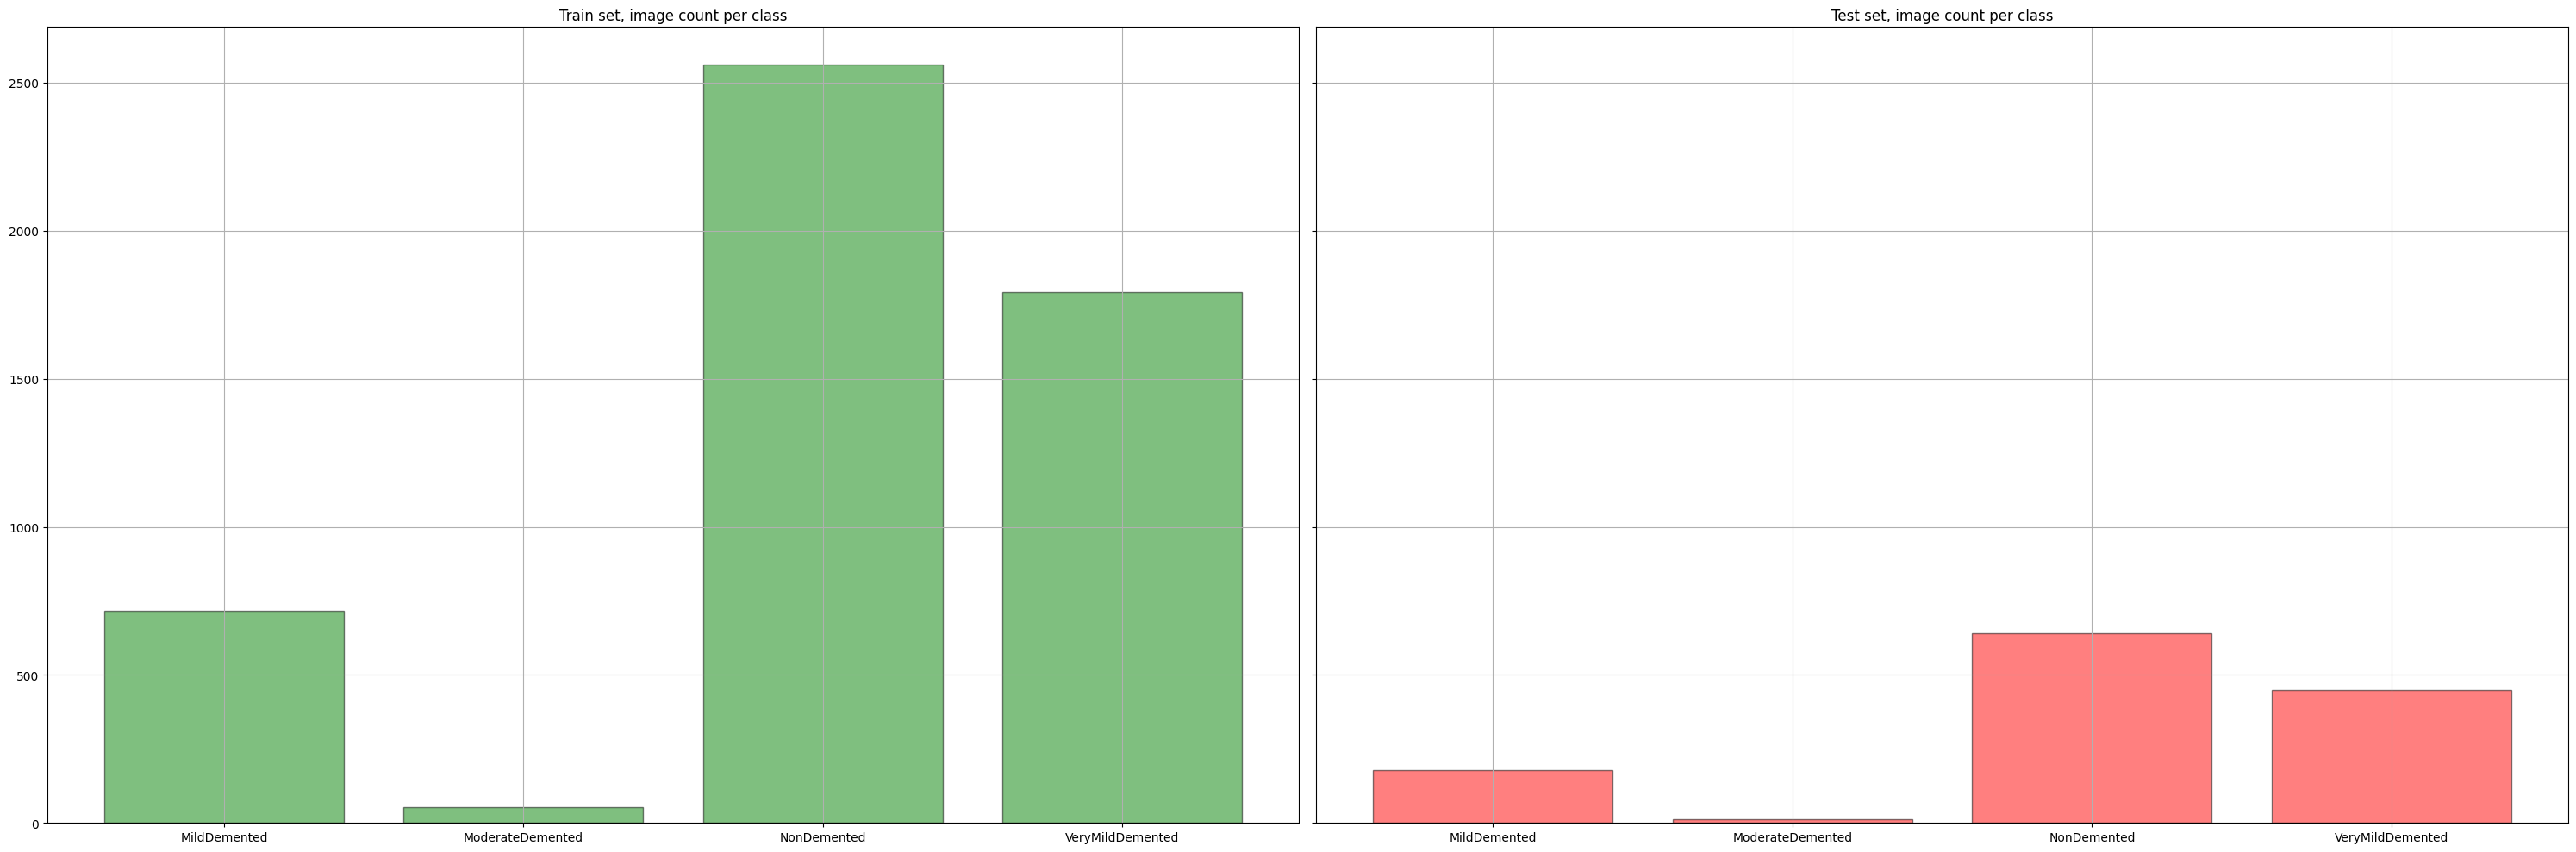

In [ ]:
# @title Visualizing & imbalance investigation


fig, axes = plt.subplots(1, 2, figsize=(30, 10), sharey=True)

axes[0].bar(x=list(train_class_dict.keys()), height=list(train_class_dict.values()), color='green', edgecolor='k', alpha=0.5)
axes[0].set_title('Train set, image count per class')
axes[0].grid()

axes[1].bar(x=list(test_class_dict.keys()), height=list(test_class_dict.values()), color='red', edgecolor="k", alpha=0.5)
axes[1].set_title('Test set, image count per class')  # Corrected 'set_tittle' to 'set_title'
axes[1].grid()

plt.tight_layout()
plt.show()


In [ ]:
class_labels = {0:"MildDemented",
                1:"ModerateDemented",
                2:"NonDemented",
                3:"VeryMildDemented" }

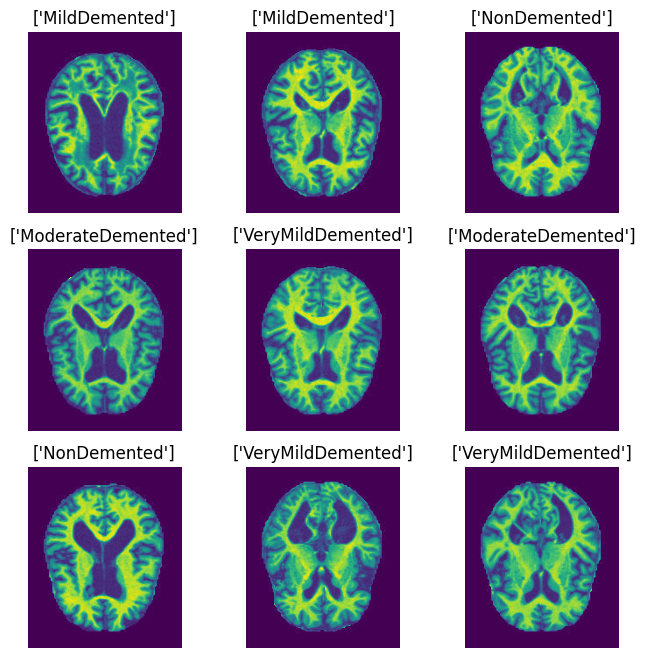

In [ ]:
figure = plt.figure (figsize=(8,8))
cols , rows =3, 3
for i in range (1, cols * rows + 1):
  key = torch.randint (len (targets) , size=(1,)).item()
  target=targets[key]
  sample_idx=torch.randint(len(train_dict[target]), size=(1,)).item()
  file_path = train_dict[target][sample_idx]
  img=mpimg.imread (file_path)
  figure.add_subplot(rows , cols , i)
  plt.title([target])
  plt.axis('off')
  plt.imshow(img)
plt.show()


